In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Imputer

from sklearn.utils.estimator_checks import check_estimator

from sklearn.cross_validation import cross_val_score

In [2]:
trn_all = pd.read_csv('../data/train.csv')  # column #0 in our file is index

#selected features and Cut off outliers of Expected >= 69
#trn_new = trn_all[trn_all['Expected']<69]
trn_new = trn_all

#combine observations with same ID by using mean
#replace Nan by overall mean
trn_mean = trn_new.groupby(trn_new.Id).agg(['mean', 'median', 'std', 'count', 'min', 'max'])
trn_mean.columns = ['_'.join(col).strip() for col in trn_mean.columns.values]
trn_mean = trn_mean.drop(['Expected_count', 'Expected_median', 'Expected_std', 'Expected_min', 'Expected_max'], axis =1)

del trn_all
del trn_new

In [3]:
# ignore id's where all Ref vales are NaN
trn_mean = trn_mean[pd.notnull(trn_mean.Ref_mean)]

# Imputing
index2 = list(trn_mean)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

trn_mean= pd.DataFrame(imp.fit_transform(trn_mean),index = trn_mean.index, columns=index2)

# data preparation
X = trn_mean.loc[:,'minutes_past_mean':'Kdp_5x5_90th_max']
y = trn_mean.loc[:,'Expected_mean']

del trn_mean

In [30]:
from mp import MPRegressor
import matplotlib.pyplot as plt
# plot plots inline
%matplotlib inline  

scale = np.arange(0.75,0.85,0.01)
indexes = range(0,len(scale))
#print indexes
#print scale

In [31]:
MAE = []
for idx in indexes: 
    estimator=MPRegressor(power_scaling=scale[idx])
    estimator.fit(X = X, y =y)
    y_est = estimator.predict(X = X)
    MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

In [32]:
#MAE

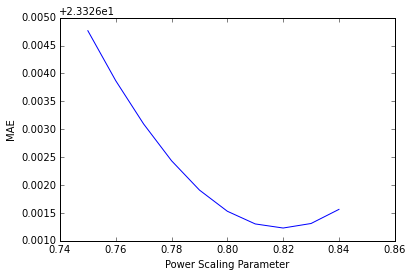

In [33]:
plt.plot(scale, MAE)
plt.xlabel("Power Scaling Parameter")
plt.ylabel("MAE")